# Парсер с Риа новости https://ria.ru/search/

In [67]:
import requests
from bs4 import BeautifulSoup
import numpy as np
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://newssearch.yandex.ru/yandsearch?rpt=nnews2&rel=rel&within=9'
HEADER = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                         'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36', 
          'accept': '*/*'}
r = requests.get(url, headers = HEADER)
soup = BeautifulSoup(r.content.decode('utf-8','ignore'), 'html.parser')
news = []
for link in soup.find_all('li', class_ =  'search-item'):
    news+=[link.text]
news

for i in tqdm(range(100)):
    r = requests.get(url, headers = HEADER)
    soup = BeautifulSoup(r.content.decode('utf-8','ignore'), 'html.parser')
    if len(soup.find_all('li', class_ =  'search-item')):
        print(123)    
soup

In [4]:
url = 'https://ria.ru/search/'
# url = 'https://ria.ru/services/search/getmore/?query=&amp;offset=20&amp;interval=week'

HEADERS = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                         'AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36', 
          'accept': '*/*'}

# /services/search/getmore/?query=&offset=20&interval=period&date_from=2020-12-18&date_to=2020-12-25

PARAMS = {'interval': "period",
          'date_from':'2020-12-18',
          'date_to':'2020-12-25',
          'offset':"0"}
r = requests.get(url,params = PARAMS)
soup = BeautifulSoup(r.text, 'html.parser')

In [5]:
len_news = int(soup.find_all('div', class_ =  'rubric-count m-active')[0].text.split(' ')[0])
len_news

6077

In [6]:
len_news//20

303

In [8]:
item = soup.find_all('div', class_ =  'list-item')[0]

In [18]:
item

<div class="list-item"><div class="list-item__content"><a class="list-item__image" href="https://rsport.ria.ru/20201225/scherbakova-1591008586.html"><picture><source media="(min-width: 480px)" media-type="ar16x9" srcset="https://cdn24.img.ria.ru/images/07e4/0c/19/1590990998_0:0:2658:1495_436x0_80_0_0_5dd569dcec7b324c2817c6e97519ad9f.jpg"/><source media="(min-width: 375px)" media-type="ar4x3" srcset="https://cdn22.img.ria.ru/images/07e4/0c/19/1590990998_276:0:2639:1772_186x0_80_0_0_6c876a4330c6775eb27b7eb1ea73f23c.jpg"/><source media="(min-width: 0px)" media-type="ar1x1" srcset="https://cdn21.img.ria.ru/images/07e4/0c/19/1590990998_572:0:2344:1772_140x0_80_0_0_f95f880a8f205a31ae33db0d29dcf637.jpg"/><img alt="Анна Щербакова" class="responsive_img m-list-img" data-responsive0="https://cdn21.img.ria.ru/images/07e4/0c/19/1590990998_572:0:2344:1772_140x0_80_0_0_f95f880a8f205a31ae33db0d29dcf637.jpg" data-responsive375="https://cdn22.img.ria.ru/images/07e4/0c/19/1590990998_276:0:2639:1772_186x

In [36]:
def take_news(link):
    new_item = {}
    new_item['date'] = link.find('div', class_="list-item__date").text.split(', ')[0]
    new_item['time'] = link.find('div', class_="list-item__date").text.split(', ')[1]
    new_item['views'] = int(link.find('div', class_='list-item__views-text').text)
    
    new_item['headline'] = link.find('span',class_="share").get('data-title')
    new_item['link']= link.find('a').get('href')
    
    return new_item
    
take_news(item)

{'date': '25 декабря',
 'time': '23:50',
 'views': 15988,
 'headline': 'Упала на плечо Тутберидзе: Щербакова лидирует после короткой программы ',
 'link': 'https://rsport.ria.ru/20201225/scherbakova-1591008586.html'}

In [150]:
news = []

for i in tqdm(range(30)):#len_news//20
    offset = i*20
    PARAMS = {'interval': "period",
          'date_from':'2020-12-18',
          'date_to':'2020-12-25',
          'offset': offset}
    r = requests.get(url,params = PARAMS)
    soup = BeautifulSoup(r.text, 'html.parser')

    for link in soup.find_all('div', class_ =  'list-item'):
        news_one = take_news(link)
        if news_one['views']>10000: #отсев новостей с менее 10к просмотров
            news.extend([take_news(link)])
    
len(news)

91

In [151]:
news[:2]

[{'date': '25 декабря',
  'time': '23:50',
  'views': 16008,
  'headline': 'Упала на плечо Тутберидзе: Щербакова лидирует после короткой программы ',
  'link': 'https://rsport.ria.ru/20201225/scherbakova-1591008586.html'},
 {'date': '25 декабря',
  'time': '22:49',
  'views': 18104,
  'headline': 'Ученые объяснили опасность "британского" штамма коронавируса',
  'link': 'https://ria.ru/20201225/shtamm-1591005690.html'}]

**Тесты**

In [12]:
item.find('span').get('data-title')

In [13]:
item.find('span',class_="share").get('data-title')

'Упала на плечо Тутберидзе: Щербакова лидирует после короткой программы '

In [21]:
item.find('div', class_="list-item__date").text

'25 декабря, 23:50'

In [25]:
item.find('div', class_='list-item__views-text').text

'15988'

**конец тестам**

# Графики просмотров - views

In [152]:
views = np.array([])
for n in news:
    views = np.append(views,n['views'])
views = views.astype(int)
views[:10]

array([ 16008,  18104,  12764, 174615,  17464,  14375,  20538,  13537,
        17025,  31051])

In [153]:
views.sort()
views[-100:]

array([ 10097,  10151,  10215,  10354,  10509,  10725,  11699,  11775,
        12706,  12713,  12764,  12834,  12871,  13329,  13342,  13422,
        13500,  13537,  13721,  13941,  13952,  13968,  14375,  14535,
        14659,  15491,  15699,  16008,  16791,  17013,  17025,  17464,
        17516,  18066,  18104,  18112,  20115,  20507,  20538,  21043,
        21077,  22220,  22691,  23964,  24166,  25153,  25728,  26516,
        27392,  27672,  27870,  28268,  30264,  30333,  31051,  33277,
        37308,  38484,  39052,  39198,  39869,  40120,  40697,  44407,
        44995,  50458,  50868,  52703,  55632,  56642,  57569,  60696,
        61689,  65244,  66273,  71679,  72760,  73469,  78457,  89353,
        93097,  94037,  98942, 117101, 128637, 135872, 162318, 174615,
       207732, 254281, 419641])

In [154]:
len(views[views<100])

0

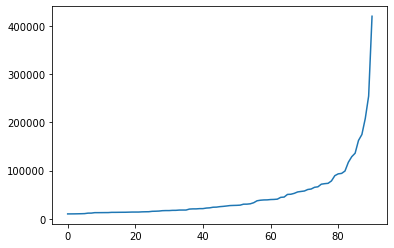

In [155]:
plt.plot(views)
plt.show()

In [156]:
num_views_hist = 10
views_hist = np.histogram(views, bins = np.linspace(views.min(),views.max(), num_views_hist))
views_hist = views_hist[0].astype(np.int64)
views_hist

array([68, 15,  3,  2,  1,  1,  0,  0,  1], dtype=int64)

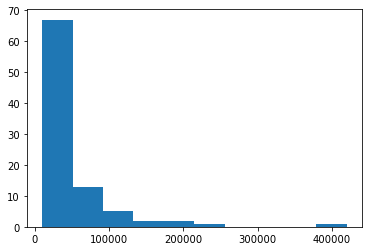

In [157]:
plt.hist(views, bins = num_views_hist)#np.linspace(0,len(views), 7)
plt.show()